# Visualising the `esda` Moran Matrix with `splot`

`esda.moran.Moran_BV_matrix` offers you a tool to assess the relationship between multiple input variables over space. `Moran_BV_matrix` returns a dictionary of `Moran_BV` objects which can be displayed and further analysed. In case you are not familiar with Moran Statistics, have a look at `splot`'s `esda_morans_viz.ipynb` notebook. 

## Contents

* Needed imports
* Example 1: Use a list as input
* Example 2: Use a gdf as input

## Imports

In [1]:
from libpysal.weights.contiguity import Queen
from libpysal import examples
import libpysal as lp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
% matplotlib inline

## Example 1: define your varnames in a list

There are generally two ways in which a `Moran_BV_matrix` and a `splot.esda.moran_facet` can be generated. The first of the two options is to use `np.arrays` of variables and additionally a list of names describing each variable. In this example, we know that we would like to examine all values in the columns `varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']` and can pass in a list of column names. From these names we can create separate `np.arrays` containign the values of each individual variable/ column with `vars = [np.array(f.by_col[var]) for var in varnames]`:

In [2]:
f = gpd.read_file(examples.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
varnames

['SIDR74', 'SIDR79', 'NWR74', 'NWR79']

In [3]:
variable = [np.array(f[variable]) for variable in varnames]
variable[0]

array([0.91659 , 0.      , 1.568381, 1.968504, 6.333568, 4.820937,
       0.      , 0.      , 4.132231, 0.620347, 1.932367, 3.596314,
       2.393776, 2.570694, 1.834862, 4.988914, 1.831502, 1.271456,
       0.755858, 2.066116, 1.331558, 0.      , 0.788022, 1.429593,
       0.843313, 1.421157, 2.782534, 4.531722, 1.264223, 2.007528,
       1.989555, 0.      , 2.734482, 1.66251 , 0.      , 1.291156,
       1.104667, 2.614379, 0.966417, 0.8285  , 0.      , 1.452169,
       1.399384, 5.050505, 0.      , 2.569373, 1.570916, 1.215067,
       2.971367, 0.651324, 2.748331, 0.868961, 1.197605, 1.500375,
       0.947867, 0.      , 2.600297, 4.444444, 4.597701, 2.220249,
       4.010695, 2.71166 , 1.588983, 2.055076, 3.610108, 1.749781,
       1.888218, 2.038169, 0.731886, 2.384738, 2.122241, 1.942502,
       0.      , 2.786291, 2.557545, 1.220324, 1.876173, 0.      ,
       1.322314, 1.845018, 1.94742 , 1.865855, 1.730104, 1.021711,
       9.55414 , 4.685408, 0.      , 1.610954, 1.451379, 0.   

Next, we can open a file containing pre calculated spatial weights for "sids2.dbf". In case you don't have spatial weights, check out `libpysal.weights` which will provide you with many options calculating your own.

In [4]:
w = lp.io.open(examples.get_path("sids2.gal")).read()
w

Now we are ready to import and generate our `Moran_BV_matrix`:

In [5]:
from esda.moran import Moran_BV_matrix

matrix = Moran_BV_matrix(variable, w, varnames = varnames)
matrix

{(0, 1): <esda.moran.Moran_BV at 0x1167142b0>,
 (1, 0): <esda.moran.Moran_BV at 0x116722da0>,
 (0, 2): <esda.moran.Moran_BV at 0x116722e10>,
 (2, 0): <esda.moran.Moran_BV at 0x116722cc0>,
 (0, 3): <esda.moran.Moran_BV at 0x116722dd8>,
 (3, 0): <esda.moran.Moran_BV at 0x1167252e8>,
 (1, 2): <esda.moran.Moran_BV at 0x1167253c8>,
 (2, 1): <esda.moran.Moran_BV at 0x116725390>,
 (1, 3): <esda.moran.Moran_BV at 0x116729908>,
 (3, 1): <esda.moran.Moran_BV at 0x116729b38>,
 (2, 3): <esda.moran.Moran_BV at 0x116729b00>,
 (3, 2): <esda.moran.Moran_BV at 0x116729ac8>}

Let's visualise our matrix with `splot.esda.moran_facet()`. You will see Univariate Moran objects with a grey background, surrounded by all possible combinations of your input dataset:

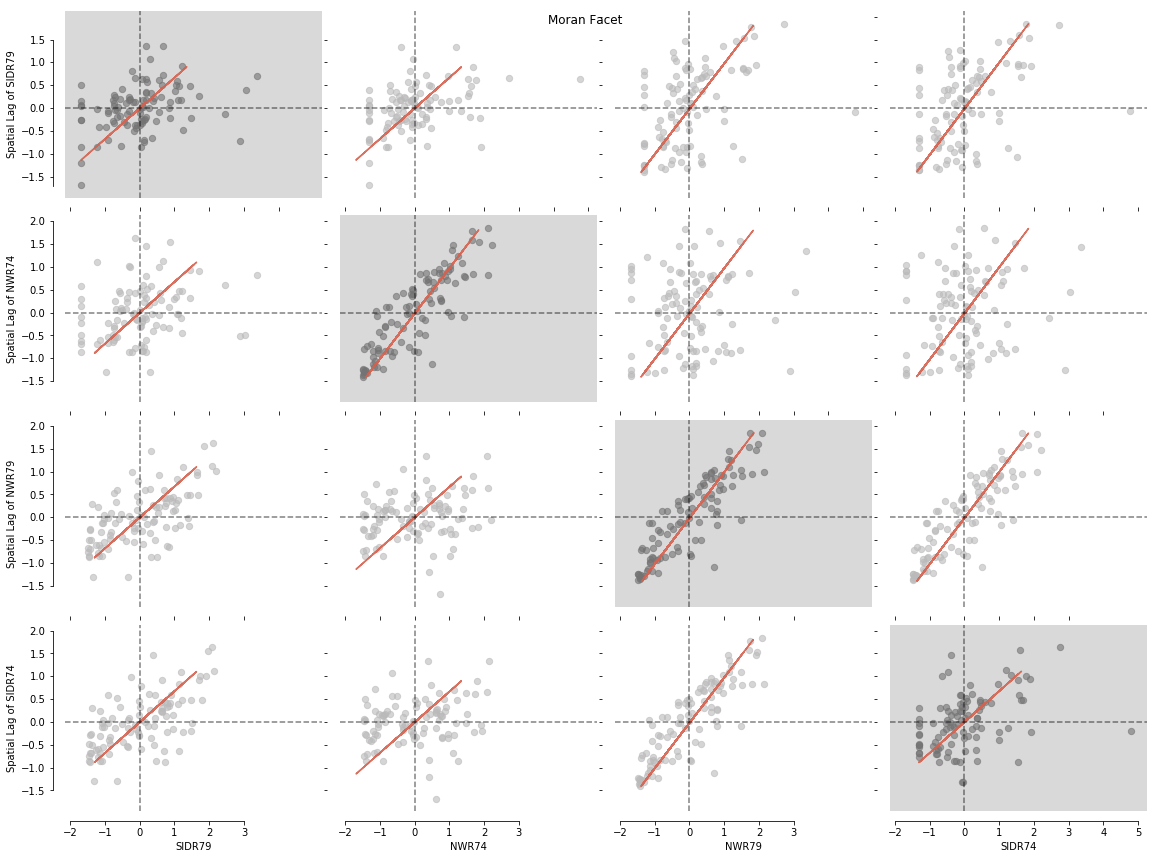

In [6]:
from splot.esda import moran_facet

moran_facet(matrix)
plt.show()

## Example 2: insert a DataFrame

Additionally, it is possible to generte your `Moran_BV_matrix` and a `moran_facet` using a `pandas` or `geopandas` DataFrame as input. Let's have a look at a simple example examining `columbus.shp` example data:

In [7]:
path = examples.get_path('columbus.shp')
gdf = gpd.read_file(path)

In order for `moran_facet` to generate sensible results, it is recommended to extract all columns you would specifically like to analyse and generate a new GeoDataFrame:

In [8]:
variables2 = gdf[['HOVAL', 'CRIME', 'INC', 'EW']]
variables2.head()

,HOVAL,CRIME,INC,EW
0,80.467003,15.725980,19.531,1.0
1,44.567001,18.801754,21.232,0.0
2,26.350000,30.626781,15.956,1.0
3,33.200001,32.387760,4.477,0.0
4,23.225000,50.731510,11.252,1.0


In [9]:
variables2.shape

(49, 4)

We will now generate our own spatial weights leveraging `libpysal` and create a second `matrix2` from our GeoDataFrame. Note that there is no list of `varnames` needed, this list will be automatically extracted from teh first row of your `gdf`:

In [10]:
w2 = Queen.from_shapefile(path)
w2

In [11]:
matrix2 = Moran_BV_matrix(variables2, w2)
matrix2

{(0, 1): <esda.moran.Moran_BV at 0x11993ba90>,
 (1, 0): <esda.moran.Moran_BV at 0x119887668>,
 (0, 2): <esda.moran.Moran_BV at 0x11993b400>,
 (2, 0): <esda.moran.Moran_BV at 0x11993be80>,
 (0, 3): <esda.moran.Moran_BV at 0x11993b7f0>,
 (3, 0): <esda.moran.Moran_BV at 0x11993beb8>,
 (1, 2): <esda.moran.Moran_BV at 0x11993bc18>,
 (2, 1): <esda.moran.Moran_BV at 0x11993b780>,
 (1, 3): <esda.moran.Moran_BV at 0x11993be10>,
 (3, 1): <esda.moran.Moran_BV at 0x11993b6d8>,
 (2, 3): <esda.moran.Moran_BV at 0x11993b668>,
 (3, 2): <esda.moran.Moran_BV at 0x11993b6a0>}

Like in the first example we can now plot our data with a simple `splot` call:

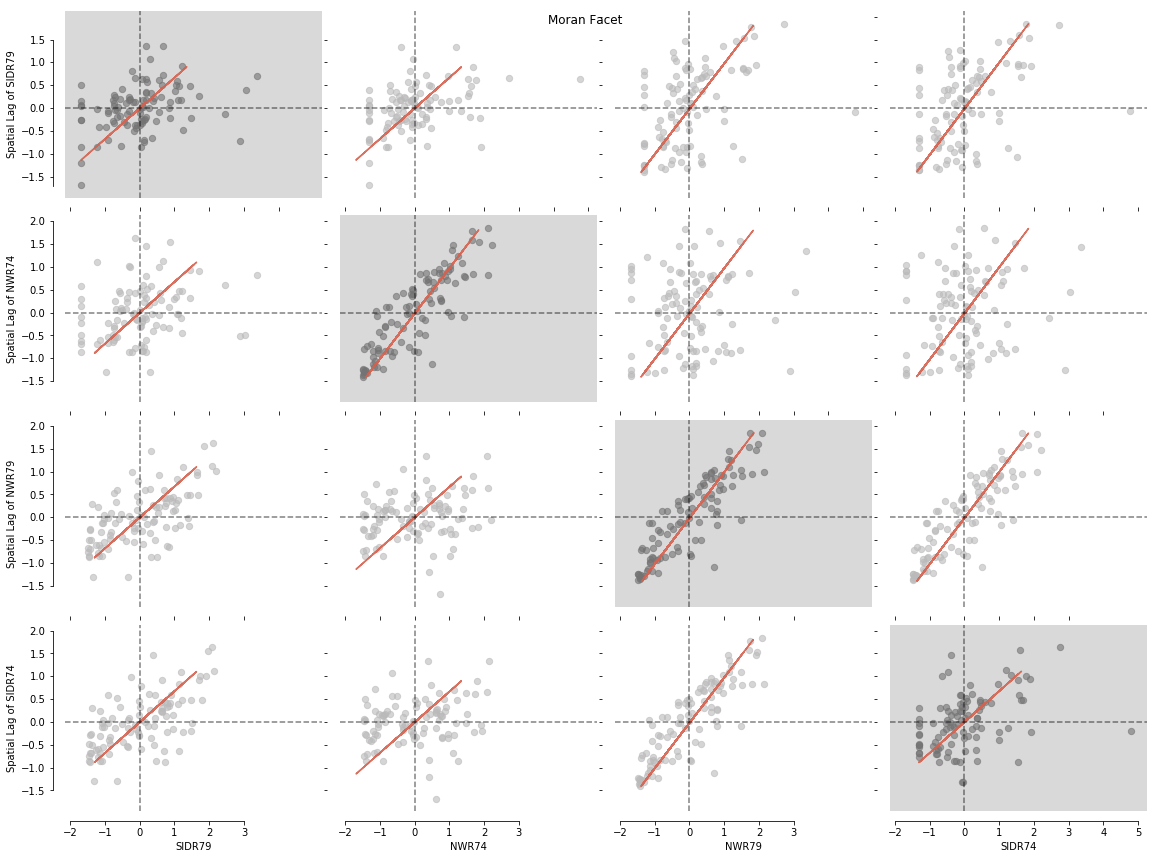

In [12]:
moran_facet(matrix)
plt.show()